In [1]:
from carlanet.simulator.YOLOPv2 import YOLOPv2

c:\Users\thomi\scoop\apps\miniconda3\current\envs\clrnet\lib\site-packages\tqdm-4.65.0-py3.8.egg\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = YOLOPv2(device="cuda")

In [3]:
import cv2

image = cv2.imread("0004.jpg")
output, img = model.transform_image(image)
img.shape, output.shape

((720, 1280, 3), (3, 384, 640))

In [4]:
preds = model.predict(image)

In [5]:
import matplotlib.pyplot as plt

img_f = model.show_detection(preds)

c:\Users\thomi\scoop\apps\miniconda3\current\envs\clrnet\lib\site-packages\torch\nn\functional.py:3451: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


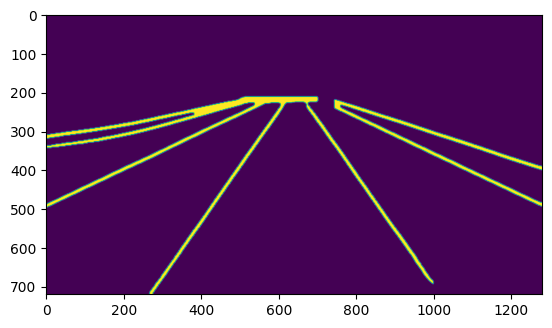

In [6]:
plt.imshow(img_f)

In [20]:
import os

def process_image(file_path, save_path):
    """Process an image and save the detection result."""
    image = cv2.imread(file_path)
    preds = model.predict(image)
    img_f = model.show_detection(preds)
    
    # Save the detection result
    cv2.imwrite(save_path, img_f)

def process_directory_recursive(input_dir, base_output_dir):
    """Recursively process all images in a directory and save results."""
    count = 0
    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(root, file)
                
                # Create the output path, keeping the directory structure but changing the root
                rel_path = os.path.relpath(file_path, input_dir)
                output_file_path = os.path.join(base_output_dir, rel_path)
                
                # Ensure the directory exists
                output_dir = os.path.dirname(output_file_path)
                os.makedirs(output_dir, exist_ok=True)
                
                process_image(file_path, output_file_path)
                print(f"Saved {count} image to {output_file_path}", end='\r')
                count += 1

    return count

dirs = ["Town10_HD_ClearNight"]

for dir in dirs:
    dir_path = f'G:\\all-project\\test-lanedetection\\Carla-Lane-Detection-Dataset-Generation\\data\\dataset\\{dir}'
    output_directory = f'G:\\all-project\\thesis-project\\carlanet\\detection-results\\YOLO_{dir}'
    # Create output directory
    os.makedirs(output_directory, exist_ok=True)
    count = process_directory_recursive(dir_path, output_directory)
    print(f"Saved {count} images to {output_directory}")

    with open(f'{dir}/count.txt', 'w') as f:
        f.write(str(count))

# # Call the function on your directory
# dir_path = 'G:\\all-project\\test-lanedetection\\Carla-Lane-Detection-Dataset-Generation\\data\\dataset\\Town10_HD_HardRainSunset'
# output_directory = 'G:\\all-project\\thesis-project\\carlanet\\detection-results'  # Directory where you want to save the detection results
# count = process_directory_recursive(dir_path, output_directory)

# # Save the COUNT value to a file
# with open('count.txt', 'w') as f:
#     f.write(str(count))

c:\Users\thomi\scoop\apps\miniconda3\current\envs\clrnet\lib\site-packages\torch\nn\functional.py:3451: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


Saved 430 images to G:\all-project\thesis-project\carlanet\detection-results\YOLO_Town10_HD_ClearNightNone\straight\0016.jpgjpg


FileNotFoundError: [Errno 2] No such file or directory: 'Town10_HD_ClearNight/count.txt'